<a href="https://colab.research.google.com/github/Jessvcv/Data-Science/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 59.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams
import scipy
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import dmba
from dmba import regressionSummary
from dmba import adjusted_r2_score

Colab environment detected.


In [ ]:
%matplotlib inline

In [ ]:
path = "/content/drive/MyDrive/DSC1010_Spring2024/BostonHousing (1).csv"
ds = pd.read_csv(path)

In [ ]:
ds.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1


In [ ]:
predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
outcome ='MEDV'

In [ ]:
X = pd.get_dummies(ds[predictors], drop_first=True)
y = ds[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
housing_lm = LinearRegression()
housing_lm.fit(train_X, train_y)

LinearRegression()

In [ ]:
coefficients_df = pd.DataFrame({'Predictor': X.columns, 'Coefficient': housing_lm.coef_})
print(coefficients_df)

   Predictor  Coefficient
0       CRIM    -0.072284
1         ZN     0.055409
2      INDUS    -0.039019
3       CHAS     2.732589
4        NOX   -16.755402
5         RM     3.817452
6        AGE    -0.000309
7        DIS    -1.359343
8        TAX     0.000604
9    PTRATIO    -0.752383
10     LSTAT    -0.511200


In [ ]:
regressionSummary(train_y, housing_lm.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 4.6399
            Mean Absolute Error (MAE) : 3.2216
          Mean Percentage Error (MPE) : -3.6534
Mean Absolute Percentage Error (MAPE) : 16.8954


In [ ]:
housing_lm_pred = housing_lm.predict(valid_X)
result = pd.DataFrame({'Predicted': housing_lm_pred, 'Actual': valid_y, 'Residual': valid_y - housing_lm_pred})
print(result.head(20))

     Predicted  Actual   Residual
307  31.087400    28.2  -2.887400
343  28.869497    23.9  -4.969497
47   17.546413    16.6  -0.946413
67   22.063069    22.0  -0.063069
362  16.718506    20.8   4.081494
132  21.425004    23.0   1.574996
292  32.014737    27.9  -4.114737
31   18.780316    14.5  -4.280316
218  23.412708    21.5  -1.912708
90   27.227343    22.6  -4.627343
481  25.447785    23.7  -1.747785
344  29.874348    31.2   1.325652
119  21.469243    19.3  -2.169243
66   26.597087    19.4  -7.197087
312  22.958073    19.4  -3.558073
407  19.039040    27.9   8.860960
376  16.812224    13.9  -2.912224
225  38.367023    50.0  11.632977
201  30.893684    24.1  -6.793684
147   8.365422    14.6   6.234578


In [ ]:
regressionSummary(valid_y, housing_lm_pred)


Regression statistics

                      Mean Error (ME) : -0.0435
       Root Mean Squared Error (RMSE) : 5.1648
            Mean Absolute Error (MAE) : 3.6478
          Mean Percentage Error (MPE) : -5.2251
Mean Absolute Percentage Error (MAPE) : 17.1770


<Axes: >

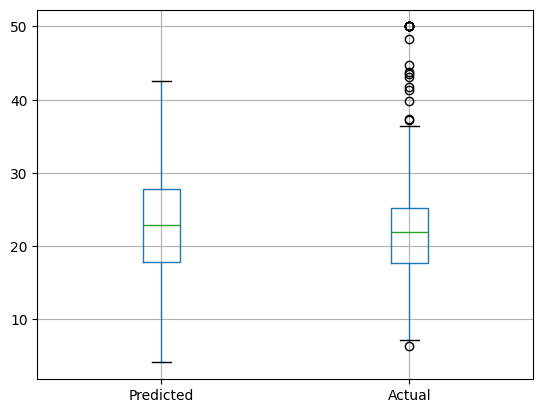

In [ ]:
df = result[['Predicted', 'Actual']]
df.boxplot()